# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/Google_Stock_Price_Train.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
training_set = df.iloc[:, 1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output.
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train.shape

(1198, 60)

In [8]:
y_train.shape

(1198,)

In [9]:
# Reshaping, adding 3rd dimension for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # Parameters in the paranthesis: Batch_size, timesteps, input_dimensions

# Building the RNN

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
# RNN initialising
regressor = Sequential()

In [12]:
# Adding the first LSTM and some Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1))) # return_sequences is true because we will add more LSTM layers. input shape needs last 2 dimensions as argument. First one will be automatically taken into account.

# Adding dropout regularisation.
regressor.add(Dropout(rate = 0.2)) # Classic/Relevant number to use is 0.2. We are doing it to prevent overfitting.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Second LSTM layer and Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences= True)) # Don't need to specify input_shape again.

regressor.add(Dropout(rate = 0.2)) # Adding dropout for each LSTM layer.

In [14]:
# Third LSTM layer and Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences= True))

regressor.add(Dropout(rate = 0.2))

In [15]:
# Fourth LSTM layer and Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences= False)) # In the last LSTM layer, we specify return sequences false. (Default value is also false)

regressor.add(Dropout(rate = 0.2))

In [16]:
# Adding the Output Layer
regressor.add(Dense(units = 1)) # Using one unit because it's regression.

In [17]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
# Fitting the RNN to the Training set.
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - loss: 0.0972
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0065
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0053
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0051
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0052
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0046
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0043
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - loss: 0.0051
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0049
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0041
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0054
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0039
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s

# Making the predictions and visualizing the results

In [19]:
# Getting the next month's stock price.
test_data = pd.read_csv('dataset/Google_Stock_Price_Test.csv')
real_stock_price = test_data.iloc[:,1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [20]:
# Getting the next month's predicted stock price.

dataset_total = pd.concat((df['Open'], test_data['Open']), axis =0)
inputs = dataset_total[len(dataset_total)- len(test_data) -60:].values # We are predicting values from 60 previous days. So we extract test_data days and 60 days from the total data.
inputs = inputs.reshape(-1,1) # ValueError: Expected 2D array, got 1D array instead.
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(test_data) + 60):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # Making it 3D for RNN


In [21]:
predicted_stock_price = regressor.predict(X_test) # Making a predictions using X_test vals.
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # Scaling it back

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


In [22]:
predicted_stock_price

array([[769.0168 ],
       [766.1061 ],
       [766.6249 ],
       [768.1706 ],
       [771.5231 ],
       [777.39294],
       [782.4607 ],
       [784.07806],
       [784.1149 ],
       [784.0045 ],
       [784.1152 ],
       [784.17554],
       [784.1868 ],
       [784.8436 ],
       [785.8257 ],
       [790.699  ],
       [797.73035],
       [804.906  ],
       [808.30035],
       [803.2703 ]], dtype=float32)

# Visualizing the results

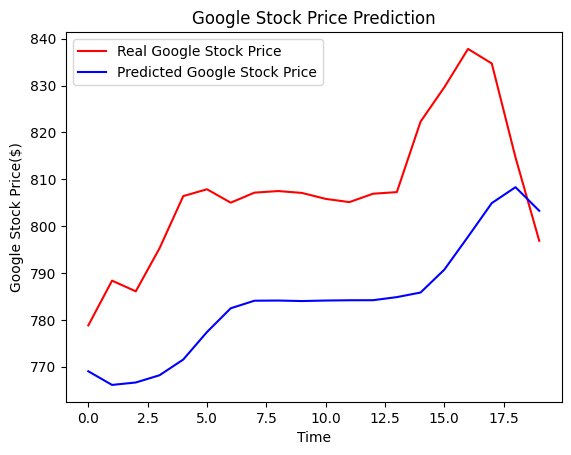

In [23]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price($)')
plt.legend()
plt.show()